In [6]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [7]:
# Membaca dataset
df = pd.read_csv('dataset.csv')

In [8]:
# Fungsi untuk mengklasifikasikan tekanan darah
def classify_blood_pressure(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif (systolic >= 120 and systolic < 130) and diastolic < 80:
        return 'Elevated'
    elif (systolic >= 130 and systolic < 140) or (diastolic >= 80 and diastolic < 90):
        return 'Hypertension Stage 1'
    elif systolic >= 140 or diastolic >= 90:
        return 'Hypertension Stage 2'
    else:
        return 'Error'

In [9]:
# Menambahkan kolom klasifikasi
df['Klasifikasi'] = df.apply(lambda x: classify_blood_pressure(x['Sistolik'], x['Diastolik']), axis=1)

# Menyiapkan feature names
feature_names = ['Sistolik', 'Diastolik']

In [10]:
# Menyiapkan data untuk model
X = df[feature_names]
y = df['Klasifikasi']

In [11]:
# Mengubah label kategorikal menjadi numerik
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [13]:
# Visualisasi 1: Decision Tree dan Analisis
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

Text(0.5, 1.0, 'Pohon Keputusan Tekanan Darah')

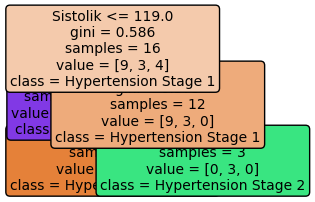

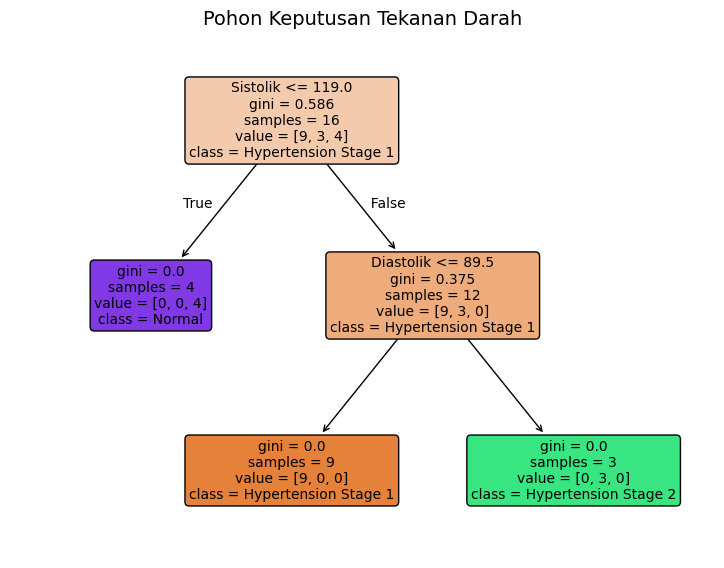

In [15]:
# 1. Decision Tree
plt.subplot(2, 2, 1)
plot_tree(dt_model, feature_names=feature_names, 
          class_names=le.classes_, filled=True, rounded=True,
          fontsize=10)# Visualisasi 1: Decision Tree dan Analisis
plt.figure(figsize=(20, 15))

# 1. Decision Tree
plt.subplot(2, 2, 1)
plot_tree(dt_model, feature_names=feature_names, 
          class_names=le.classes_, filled=True, rounded=True,
          fontsize=10)
plt.title("Pohon Keputusan Tekanan Darah", fontsize=14)
plt.title("Pohon Keputusan Tekanan Darah", fontsize=14)

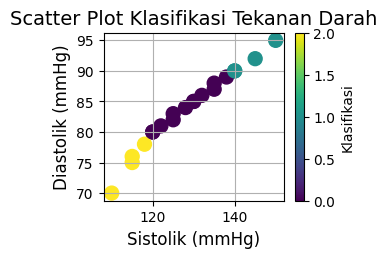

In [16]:
# 2. Scatter Plot
plt.subplot(2, 2, 2)
scatter = plt.scatter(df['Sistolik'], df['Diastolik'], 
                     c=le.transform(df['Klasifikasi']), 
                     cmap='viridis', s=100)
plt.colorbar(scatter, label='Klasifikasi')
plt.xlabel('Sistolik (mmHg)', fontsize=12)
plt.ylabel('Diastolik (mmHg)', fontsize=12)
plt.title('Scatter Plot Klasifikasi Tekanan Darah', fontsize=14)
plt.grid(True)

Text(0.5, 1.0, 'Distribusi Klasifikasi Tekanan Darah')

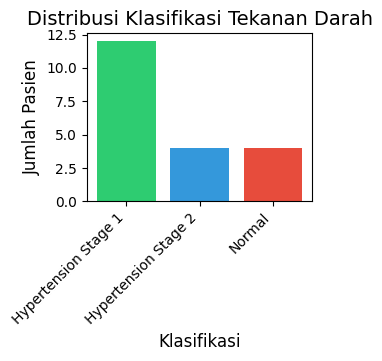

In [17]:
# 3. Distribusi Kelas
plt.subplot(2, 2, 3)
class_distribution = df['Klasifikasi'].value_counts()
plt.bar(range(len(class_distribution)), class_distribution.values, 
        color=['#2ecc71', '#3498db', '#e74c3c', '#f1c40f'])
plt.xticks(range(len(class_distribution)), class_distribution.index, 
           rotation=45, ha='right')
plt.xlabel('Klasifikasi', fontsize=12)
plt.ylabel('Jumlah Pasien', fontsize=12)
plt.title('Distribusi Klasifikasi Tekanan Darah', fontsize=14)

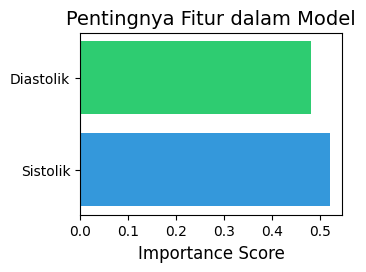

In [18]:
# 4. Feature Importance
plt.subplot(2, 2, 4)
importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_model.feature_importances_
})
plt.barh(importances['Feature'], importances['Importance'], 
         color=['#3498db', '#2ecc71'])
plt.xlabel('Importance Score', fontsize=12)
plt.title('Pentingnya Fitur dalam Model', fontsize=14)

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frekuensi')

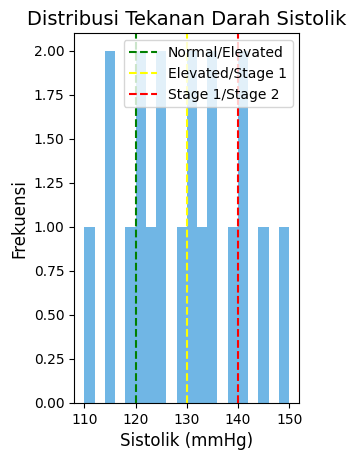

In [19]:
# 1. Distribusi Sistolik
plt.subplot(1, 2, 1)
plt.hist(df['Sistolik'], bins=20, color='#3498db', alpha=0.7)
plt.axvline(x=120, color='green', linestyle='--', label='Normal/Elevated')
plt.axvline(x=130, color='yellow', linestyle='--', label='Elevated/Stage 1')
plt.axvline(x=140, color='red', linestyle='--', label='Stage 1/Stage 2')
plt.legend()
plt.title('Distribusi Tekanan Darah Sistolik', fontsize=14)
plt.xlabel('Sistolik (mmHg)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

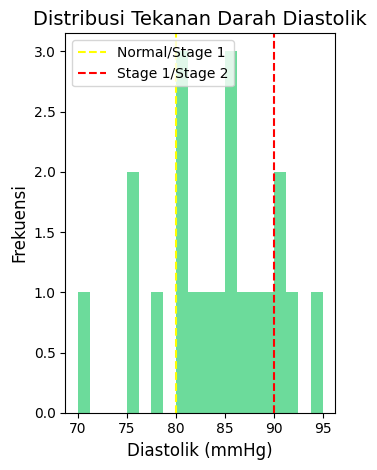

In [20]:
# 2. Distribusi Diastolik
plt.subplot(1, 2, 2)
plt.hist(df['Diastolik'], bins=20, color='#2ecc71', alpha=0.7)
plt.axvline(x=80, color='yellow', linestyle='--', label='Normal/Stage 1')
plt.axvline(x=90, color='red', linestyle='--', label='Stage 1/Stage 2')
plt.legend()
plt.title('Distribusi Tekanan Darah Diastolik', fontsize=14)
plt.xlabel('Diastolik (mmHg)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

plt.tight_layout()
plt.show()

In [21]:
# Print hasil analisis
print("\nHasil Analisis Decision Tree:")
print(f"Akurasi Training: {dt_model.score(X_train, y_train):.2f}")
print(f"Akurasi Testing: {dt_model.score(X_test, y_test):.2f}")

# Menampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(df[feature_names].describe())

# Menampilkan distribusi kelas
print("\nDistribusi Klasifikasi Tekanan Darah:")
print(df['Klasifikasi'].value_counts())


Hasil Analisis Decision Tree:
Akurasi Training: 1.00
Akurasi Testing: 1.00

Statistik Deskriptif:
         Sistolik  Diastolik
count   20.000000  20.000000
mean   128.650000  83.800000
std     10.805822   6.220509
min    110.000000  70.000000
25%    120.000000  80.000000
50%    129.000000  84.500000
75%    135.750000  88.250000
max    150.000000  95.000000

Distribusi Klasifikasi Tekanan Darah:
Klasifikasi
Hypertension Stage 1    12
Hypertension Stage 2     4
Normal                   4
Name: count, dtype: int64
